<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Ionosphere_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import  to_categorical
from sklearn.preprocessing import scale, LabelEncoder

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/ionosphere_data.csv")
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [ ]:
# Checking For Null Values
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

### OUR DATA CONTAINS NO NULL VALUES

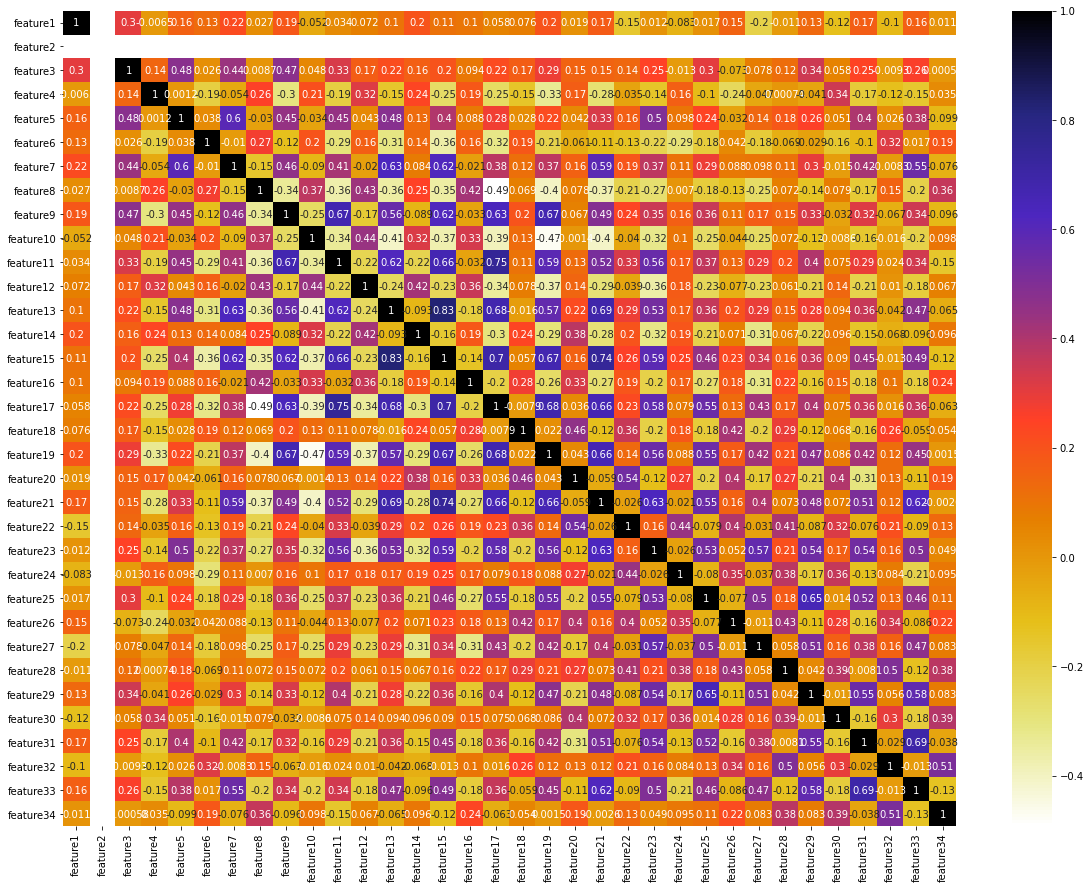

In [10]:
# Making A HeatMap of Correlations
correlations = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlations, cmap="CMRmap_r", annot = True)
plt.show()

In [ ]:
# Shuffling Data
df = df.sample(frac = 1)
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
243,1,0,0.88853,0.01631,0.92007,0.01305,0.92442,0.01359,0.89179,-0.10223,0.90103,-0.08428,0.93040,-0.01033,0.93094,-0.08918,0.86025,-0.05057,0.89451,-0.04024,0.88418,-0.12126,0.88907,-0.11909,0.82980,-0.14138,0.86453,-0.11808,0.85536,-0.13051,0.83524,-0.12452,0.86786,-0.12235,g
173,1,0,1.00000,0.45455,1.00000,-0.45455,1.00000,0.09091,1.00000,-0.09091,1.00000,0.00000,1.00000,-0.27273,1.00000,-0.18182,1.00000,0.09091,1.00000,0.00000,1.00000,-0.36364,1.00000,0.09091,1.00000,-0.09091,1.00000,-0.04914,1.00000,0.45455,1.00000,-0.27273,1.00000,-0.18182,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
338,1,0,0.32789,0.11042,0.15970,0.29308,0.14020,0.74485,-0.25131,0.91993,-0.16503,0.26664,-0.63714,0.24865,-0.97650,-0.00337,-0.23227,-0.19909,-0.30522,-0.48886,-0.14426,-0.89991,0.09345,-0.28916,0.28307,-0.18560,0.39599,-0.11498,0.31005,0.05614,0.21443,0.20540,0.13376,0.26422,g
119,1,0,0.86889,-0.07111,1.00000,-0.02494,1.00000,-0.06889,0.87778,0.00222,0.83556,-0.06444,1.00000,-0.07287,1.00000,-0.20000,0.86889,0.05333,0.88000,-0.03778,1.00000,-0.11526,1.00000,-0.18667,0.84444,0.03556,1.00000,-0.14162,0.82222,-0.14667,1.00000,-0.15609,1.00000,-0.44222,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,1,0,0.92308,0.15451,0.86399,0.29757,0.72582,0.36790,0.70588,0.56830,0.57449,0.62719,0.43270,0.74676,0.31705,0.67697,0.19128,0.76818,0.04686,0.76171,-0.12064,0.76969,-0.18479,0.71327,-0.29291,0.65708,-0.38798,0.58553,-0.46799,0.50131,-0.53146,0.40732,-0.56231,0.35095,g
42,1,0,0.90932,0.08791,0.86528,0.16888,1.00000,0.16598,0.55187,0.68154,0.70207,0.36719,0.16286,0.42739,0.57620,0.46086,0.51067,0.49618,0.31639,0.12967,0.37824,0.54462,0.31274,0.55826,0.24856,0.56527,0.18626,0.56605,0.12635,0.56101,0.06927,0.55061,0.12137,0.67739,g
130,1,0,0.00000,0.00000,0.98919,-0.22703,0.18919,-0.05405,0.00000,0.00000,0.93243,0.07297,1.00000,-0.20000,1.00000,0.07027,1.00000,-0.11351,0.00000,0.00000,1.00000,-0.21081,1.00000,-0.41622,0.00000,0.00000,1.00000,-0.17568,0.00000,0.00000,1.00000,-0.25946,0.28919,-0.15676,b
301,1,0,0.83367,0.31456,0.65541,0.57671,0.34962,0.70677,0.17293,0.78947,-0.18976,0.79886,-0.41729,0.66541,-0.68421,0.47744,-0.74725,0.19492,-0.72180,-0.04887,-0.62030,-0.28195,-0.49165,-0.53463,-0.26577,-0.66014,-0.01530,-0.69706,0.22708,-0.64428,0.43100,-0.51206,0.64662,-0.30075,g


In [ ]:
# Splitting The Dataset Into Training And Testing Data

# Training Data
train_data = df.iloc[:211,:]
train_data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
243,1,0,0.88853,0.01631,0.92007,0.01305,0.92442,0.01359,0.89179,-0.10223,0.90103,-0.08428,0.93040,-0.01033,0.93094,-0.08918,0.86025,-0.05057,0.89451,-0.04024,0.88418,-0.12126,0.88907,-0.11909,0.82980,-0.14138,0.86453,-0.11808,0.85536,-0.13051,0.83524,-0.12452,0.86786,-0.12235,g
173,1,0,1.00000,0.45455,1.00000,-0.45455,1.00000,0.09091,1.00000,-0.09091,1.00000,0.00000,1.00000,-0.27273,1.00000,-0.18182,1.00000,0.09091,1.00000,0.00000,1.00000,-0.36364,1.00000,0.09091,1.00000,-0.09091,1.00000,-0.04914,1.00000,0.45455,1.00000,-0.27273,1.00000,-0.18182,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
338,1,0,0.32789,0.11042,0.15970,0.29308,0.14020,0.74485,-0.25131,0.91993,-0.16503,0.26664,-0.63714,0.24865,-0.97650,-0.00337,-0.23227,-0.19909,-0.30522,-0.48886,-0.14426,-0.89991,0.09345,-0.28916,0.28307,-0.18560,0.39599,-0.11498,0.31005,0.05614,0.21443,0.20540,0.13376,0.26422,g
119,1,0,0.86889,-0.07111,1.00000,-0.02494,1.00000,-0.06889,0.87778,0.00222,0.83556,-0.06444,1.00000,-0.07287,1.00000,-0.20000,0.86889,0.05333,0.88000,-0.03778,1.00000,-0.11526,1.00000,-0.18667,0.84444,0.03556,1.00000,-0.14162,0.82222,-0.14667,1.00000,-0.15609,1.00000,-0.44222,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,0,0.60000,0.03333,0.63333,0.06667,0.70000,0.06667,0.70000,0.00000,0.63333,0.00000,0.80000,0.00000,0.73333,0.00000,0.70000,0.10000,0.66667,0.10000,0.73333,-0.03333,0.76667,0.00000,0.63333,0.13333,0.65932,0.10168,0.60000,0.13333,0.60000,0.16667,0.63333,0.16667,g
27,0,0,-1.00000,-1.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,-0.37500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,-1.00000,1.00000,b
143,1,0,0.31034,-0.10345,0.24138,-0.10345,0.20690,-0.06897,0.07405,-0.05431,0.03649,-0.03689,0.01707,-0.02383,0.00741,-0.01482,0.00281,-0.00893,0.00078,-0.00523,-0.00003,-0.00299,-0.00028,-0.00166,-0.00031,-0.00090,-0.00025,-0.00048,-0.00018,-0.00024,-0.00012,-0.00012,-0.00008,-0.00006,g
273,1,0,0.50112,-0.03596,0.61124,0.01348,0.58876,0.01573,0.58876,0.02472,0.66742,-0.00449,0.71685,-0.04719,0.66517,0.00899,0.57303,0.02472,0.64719,-0.07416,0.56854,0.14157,0.57528,-0.03596,0.46517,0.04944,0.56588,0.00824,0.47640,-0.03596,0.54607,0.10562,0.60674,-0.08090,g


In [ ]:
# Testing Data
test_data = df.iloc[211:,:]
test_data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
24,1,0,1.00000,-0.06182,1.00000,0.02942,1.00000,-0.05131,1.00000,-0.01707,1.00000,-0.11726,0.84493,-0.05202,0.93392,-0.06598,0.69170,-0.07379,0.65731,-0.20367,0.94910,-0.31558,0.80852,-0.31654,0.84932,-0.34838,0.72529,-0.29174,0.73094,-0.38576,0.54356,-0.26284,0.64207,-0.39487,g
55,1,0,0.08333,-0.20685,-1.00000,1.00000,-1.00000,1.00000,0.71875,0.47173,-0.82143,-0.62723,-1.00000,-1.00000,-1.00000,1.00000,-0.02753,0.59152,-0.42113,-0.42113,-0.74628,-1.00000,-1.00000,-0.46801,-1.00000,0.23810,1.00000,-1.00000,-1.00000,-0.38914,-1.00000,-1.00000,-1.00000,0.61458,b
184,1,0,-1.00000,-1.00000,-0.50694,1.00000,1.00000,-1.00000,1.00000,0.53819,0.00000,0.00000,0.23958,-1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,-0.71528,1.00000,0.33333,-1.00000,1.00000,-1.00000,0.69792,-1.00000,0.47569,1.00000,b
74,1,0,1.00000,0.05070,1.00000,0.10827,1.00000,0.19498,1.00000,0.28453,1.00000,0.34826,1.00000,0.38261,0.94575,0.42881,0.89126,0.50391,0.75906,0.58801,0.80644,0.59962,0.79578,0.62758,0.66643,0.63942,0.59417,0.69435,0.49538,0.72684,0.47027,0.71689,0.33381,0.75243,g
274,1,0,0.71521,-0.00647,0.66667,-0.04207,0.63107,-0.05178,0.77994,0.08091,0.67314,0.09709,0.64725,0.15858,0.60194,-0.01942,0.54369,-0.04531,0.46926,-0.10032,0.64725,0.14887,0.39159,0.21683,0.52427,-0.05502,0.45105,0.00040,0.31392,-0.06796,0.49191,-0.10680,0.30421,-0.05178,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,1,0,0.92308,0.15451,0.86399,0.29757,0.72582,0.36790,0.70588,0.56830,0.57449,0.62719,0.43270,0.74676,0.31705,0.67697,0.19128,0.76818,0.04686,0.76171,-0.12064,0.76969,-0.18479,0.71327,-0.29291,0.65708,-0.38798,0.58553,-0.46799,0.50131,-0.53146,0.40732,-0.56231,0.35095,g
42,1,0,0.90932,0.08791,0.86528,0.16888,1.00000,0.16598,0.55187,0.68154,0.70207,0.36719,0.16286,0.42739,0.57620,0.46086,0.51067,0.49618,0.31639,0.12967,0.37824,0.54462,0.31274,0.55826,0.24856,0.56527,0.18626,0.56605,0.12635,0.56101,0.06927,0.55061,0.12137,0.67739,g
130,1,0,0.00000,0.00000,0.98919,-0.22703,0.18919,-0.05405,0.00000,0.00000,0.93243,0.07297,1.00000,-0.20000,1.00000,0.07027,1.00000,-0.11351,0.00000,0.00000,1.00000,-0.21081,1.00000,-0.41622,0.00000,0.00000,1.00000,-0.17568,0.00000,0.00000,1.00000,-0.25946,0.28919,-0.15676,b
301,1,0,0.83367,0.31456,0.65541,0.57671,0.34962,0.70677,0.17293,0.78947,-0.18976,0.79886,-0.41729,0.66541,-0.68421,0.47744,-0.74725,0.19492,-0.72180,-0.04887,-0.62030,-0.28195,-0.49165,-0.53463,-0.26577,-0.66014,-0.01530,-0.69706,0.22708,-0.64428,0.43100,-0.51206,0.64662,-0.30075,g


In [ ]:
# Dropping Labels From Training And Testing Data

# Train Labels
train_labels = train_data.pop('label')
train_labels

243    g
173    g
347    g
338    g
119    g
      ..
151    g
27     b
143    g
273    g
283    g
Name: label, Length: 211, dtype: object

In [ ]:
# Test Labels
test_labels = test_data.pop('label')
test_labels

24     g
55     b
184    b
74     g
274    g
      ..
225    g
42     g
130    b
301    g
307    g
Name: label, Length: 140, dtype: object

In [ ]:
# Standardizing Training And Testing Data

train_data = scale(train_data)
train_data

array([[ 0.35824886,  0.        ,  0.49987828, ..., -0.23826616,
         0.97764774, -0.2777717 ],
       [ 0.35824886,  0.        ,  0.72196835, ..., -0.52736514,
         1.21989695, -0.40057986],
       [ 0.35824886,  0.        ,  0.62460097, ...,  0.00394031,
         1.06375675,  0.07219129],
       ...,
       [ 0.35824886,  0.        , -0.6520932 , ...,  0.00438895,
        -0.61352662, -0.02523748],
       [ 0.35824886,  0.        , -0.27198784, ...,  0.21064579,
         0.49894247, -0.19217563],
       [ 0.35824886,  0.        ,  0.5194434 , ..., -0.58166995,
         0.17135422,  0.24947531]])

In [ ]:
test_data = scale(test_data)
test_data

array([[ 0.33333333,  0.        ,  0.72136868, ..., -0.5006766 ,
         0.55941816, -0.93513694],
       [ 0.33333333,  0.        , -1.15150702, ..., -1.93733696,
        -2.83744507,  1.35137289],
       [ 0.33333333,  0.        , -3.36489071, ..., -1.93733696,
         0.21523667,  2.2243895 ],
       ...,
       [ 0.33333333,  0.        , -1.32176102, ..., -0.49408928,
        -0.17056601, -0.39579289],
       [ 0.33333333,  0.        ,  0.38153491, ..., -0.98638458,
         0.5688305 , -0.7219453 ],
       [ 0.33333333,  0.        , -0.2755356 , ..., -0.81137224,
        -2.66994672, -1.52564971]])

In [ ]:
# One Hot Encoding Labels

# Train Labels
train_labels = LabelEncoder().fit_transform(train_labels)
train_labels

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
# Test Labels
test_labels = LabelEncoder().fit_transform(test_labels)
test_labels

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
n_features = train_data.shape[1]
n_features

34

In [ ]:
# Making Base Model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (n_features,)))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 16)                560       
_________________________________________________________________
dropout_51 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 12)                204       
_________________________________________________________________
dense_124 (Dense)            (None, 8)                 104       
_________________________________________________________________
dropout_52 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_125 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_126 (Dense)            (None, 1)               

In [ ]:
# Fitting Model On 100 Epochs
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 8)

Epoch 1/100
27/27 [==============================] - 1s 1ms/step - loss: 0.7189 - accuracy: 0.4229
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6141
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.7549
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7604
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5778 - accuracy: 0.8671
Epoch 6/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.8780
Epoch 7/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5061 - accuracy: 0.9279
Epoch 8/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.9108
Epoch 9/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.8860
Epoch 10/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.9566
Epoch 11/

In [ ]:
# Feeding History In A DataFrame
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,epoch
95,0.036599,0.990521,95
96,0.057828,0.976303,96
97,0.037012,0.995261,97
98,0.058902,0.985782,98
99,0.029014,0.995261,99


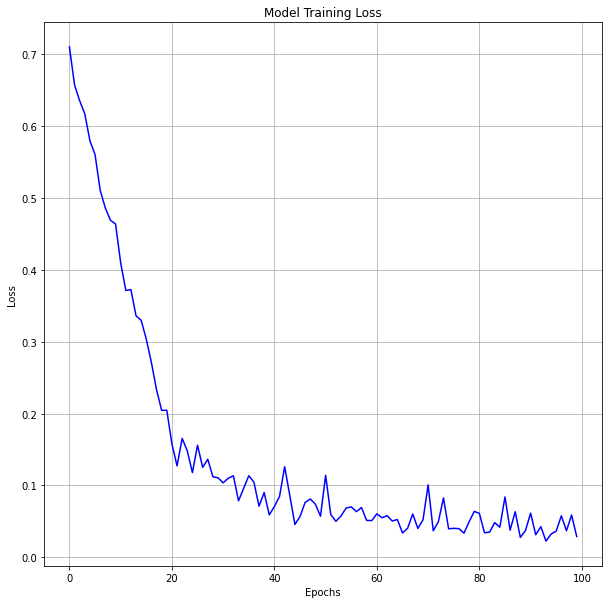

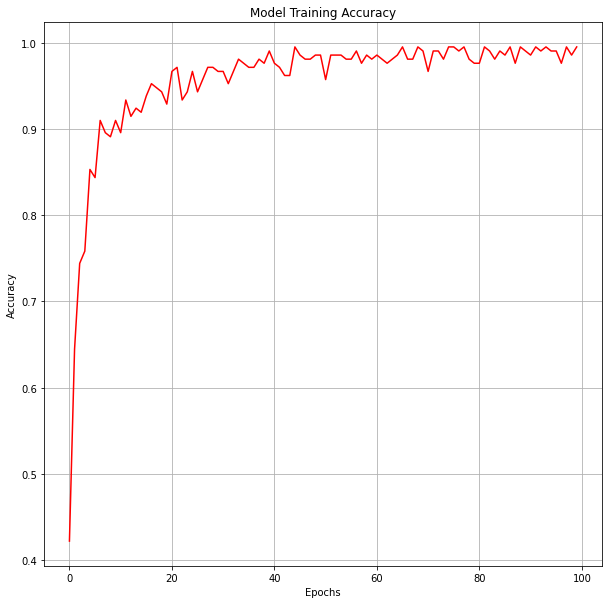

In [ ]:
# Plotting Loss And Accuracy
plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Training Loss")
plt.plot(history_df['epoch'], history_df['loss'], color = 'blue')
plt.grid()


plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Training Accuracy")
plt.plot(history_df['epoch'], history_df['accuracy'], color = 'red')
plt.grid()
plt.show()

In [ ]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions.flatten()

array([9.9646783e-01, 5.5980656e-20, 1.4152522e-18, 9.9995852e-01,
       9.8334628e-01, 9.9859202e-01, 9.9452013e-01, 9.8969460e-01,
       7.5053427e-12, 3.6706807e-30, 9.3844771e-01, 1.2078042e-05,
       9.9927199e-01, 9.8567390e-01, 9.9694872e-01, 9.9909055e-01,
       9.9875909e-01, 9.9402797e-01, 9.2167330e-01, 9.9936676e-01,
       4.5444028e-24, 9.9185860e-01, 9.4977403e-01, 9.7258288e-01,
       9.5129919e-01, 2.3859152e-01, 9.9788576e-01, 5.1574069e-01,
       9.7414219e-01, 9.9906504e-01, 1.3850014e-05, 9.9916363e-01,
       9.9945939e-01, 9.9843955e-01, 1.9815564e-04, 4.5107557e-10,
       4.9011359e-01, 9.9680555e-01, 9.9797887e-01, 9.9922806e-01,
       9.9687243e-01, 9.9752581e-01, 9.9825215e-01, 1.8392673e-01,
       9.9966121e-01, 7.2280407e-02, 9.9982834e-01, 4.3380171e-02,
       2.3805707e-11, 9.9631274e-01, 4.9949586e-03, 9.9964321e-01,
       2.8167146e-01, 9.9279225e-01, 9.9217927e-01, 9.5814443e-01,
       9.9789715e-01, 9.9933910e-01, 6.1499486e-07, 9.9500656e

In [ ]:
# Testing Model On Test Data
testing = model.evaluate(test_data, test_labels)
testing

5/5 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.9214


[0.3291108310222626, 0.9214285612106323]

In [ ]:
print(f"Testing Loss: {testing[0]}")
print(f"Testing Accuracy: {testing[1]}")

Testing Loss: 0.3291108310222626
Testing Accuracy: 0.9214285612106323
